<a href="https://colab.research.google.com/github/HassanZeb01/global-road-safety-analytics/blob/main/Accident_Severity_Prediction_Multi_Country_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Utilities
import warnings
warnings.filterwarnings('ignore')

# **Phase 01: GLOBAL ROAD SAFETY ANALYTICS: ACCIDENT SEVERITY PREDICTION :**

---

## **1. Loading Global Road Accident dataset:**

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset file in Google Drive
road_accident_df_url = '/content/drive/MyDrive/DataScienceProject/GlobalRoadSafetyAnalytics/road_accident_dataset.csv'

# Reading csv file
raw_df = pd.read_csv(road_accident_df_url)

# Loading 10 samples rows of dataset
raw_df.sample(10)

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
43327,China,2002,July,Thursday,Evening,Urban,Street,Foggy,299.907503,2,...,1,9.794331,2258.321994,Wet,Speeding,6,12339.646105,80022.990031,Australia,1484.977647
104359,Australia,2000,June,Wednesday,Afternoon,Urban,Highway,Rainy,306.672364,3,...,2,42.736178,2777.548427,Dry,Mechanical Failure,2,26630.572245,62904.107049,Europe,190.196292
52270,Brazil,2012,November,Saturday,Night,Rural,Main Road,Clear,332.824731,3,...,2,37.569166,102.685409,Wet,Distracted Driving,0,26589.199032,53171.998470,Australia,3632.097360
78214,Russia,2005,December,Saturday,Evening,Urban,Street,Snowy,383.325445,4,...,1,51.335273,920.542296,Wet,Distracted Driving,6,30477.382860,33318.931878,Europe,4813.638187
90125,Brazil,2011,November,Tuesday,Evening,Urban,Main Road,Snowy,498.226755,1,...,2,37.136689,7981.743524,Dry,Mechanical Failure,1,31453.651509,27992.908999,Asia,325.879136
97059,USA,2011,August,Sunday,Night,Urban,Highway,Snowy,243.965143,3,...,0,6.318779,5960.840983,Dry,Weather,6,25633.505944,47201.571790,Asia,1667.172823
48921,China,2013,January,Wednesday,Morning,Urban,Highway,Clear,314.207864,2,...,2,56.353897,6419.899151,Dry,Mechanical Failure,9,43182.354444,14191.898860,North America,2690.712098
58093,UK,2014,February,Saturday,Morning,Rural,Street,Foggy,250.401918,2,...,0,56.087791,5860.726033,Dry,Distracted Driving,9,34486.743522,26607.239885,Asia,711.975869
58155,Germany,2014,January,Thursday,Afternoon,Rural,Highway,Rainy,53.842482,2,...,0,19.986780,7974.874028,Dry,Weather,3,44796.542605,99415.915370,South America,3458.755959
126654,USA,2011,May,Tuesday,Afternoon,Urban,Main Road,Snowy,470.114228,3,...,1,38.856296,5248.303818,Icy,Weather,4,25428.847377,3315.465318,Australia,4138.692930


# **2. Preprocessing - Global Road Accident Dataset**

## 2.1. Dataset Dimensions:

In [ ]:
# Dataset dimensions (rows by column)
raw_df.shape

(132000, 30)

Total Rows : 132000 \
Total Columns : 30

## 2.2. Inspecting Data type and format of the dataset:

In [ ]:
#Checking summary of dataset (Null values, datatype)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      132000 non-null  object 
 1   Year                         132000 non-null  int64  
 2   Month                        132000 non-null  object 
 3   Day of Week                  132000 non-null  object 
 4   Time of Day                  132000 non-null  object 
 5   Urban/Rural                  132000 non-null  object 
 6   Road Type                    132000 non-null  object 
 7   Weather Conditions           132000 non-null  object 
 8   Visibility Level             132000 non-null  float64
 9   Number of Vehicles Involved  132000 non-null  int64  
 10  Speed Limit                  132000 non-null  int64  
 11  Driver Age Group             132000 non-null  object 
 12  Driver Gender                132000 non-null  object 
 13 

## 2.3 Checking Duplicate Rows:

In [ ]:
# Checking the duplicated rows in dataset
dup = raw_df.duplicated().sum()
print('Dupicate Rows:',dup)

Dupicate Rows: 0


## 2.4 Checking Missing Values:


In [ ]:
# checking the missing values sum in dataset columns:
raw_df.isnull().sum()

,0
Country,0
Year,0
Month,0
Day of Week,0
Time of Day,0
Urban/Rural,0
Road Type,0
Weather Conditions,0
Visibility Level,0
Number of Vehicles Involved,0


## 2.5 Checking Total Countries:


In [ ]:
# Total Number of Counteries in Global Accident Dataset
total_countries = raw_df['Country'].nunique()
print('Total Countries',total_countries)

Total Countries 10


# **3: EDA (Exploratory Data Analysis)**

## 3.1: Changing Features Datatypes for analysis

In [ ]:
raw_df['Driver Fatigue'] = raw_df['Driver Fatigue'].astype(bool)

Research Question : How many accidents per year ?

In [ ]:
# Inorder to Find out How many Accidents per year we are required to Convert Year Field from int to object .

raw_df['Year']=raw_df['Year'].astype(object)

In [ ]:

accidents_per_year = raw_df['Year'].value_counts().sort_index()
print("Number of Accidents Per Years")
print(accidents_per_year)


Number of Accidents Per Years
Year
2000    5280
2001    5263
2002    5433
2003    5327
2004    5180
2005    5302
2006    5156
2007    5307
2008    5409
2009    5298
2010    5144
2011    5356
2012    5327
2013    5220
2014    5351
2015    5331
2016    5377
2017    5278
2018    5295
2019    5243
2020    5308
2021    5243
2022    5175
2023    5242
2024    5155
Name: count, dtype: int64


## 3.2: Descriptive Statistics of Numerical Features

In [ ]:
def Descriptive_Statistics(df,dtypes):
  """
  This Method Returns Descriptive Statistics

  """
  print('Descriptive Statistics')
  colums=[]
  for col in df.columns:
    if df[col].dtype in dtypes:
      colums.append(col)
  return (df[colums].describe())




In [ ]:
Descriptive_Statistics(raw_df,dtypes=['int','float'])

Descriptive Statistics


,Visibility Level,Number of Vehicles Involved,Speed Limit,Driver Alcohol Level,Pedestrians Involved,Cyclists Involved,Number of Injuries,Number of Fatalities,Emergency Response Time,Traffic Volume,Insurance Claims,Medical Cost,Economic Loss,Population Density
count,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000
mean,275.038776,2.501227,74.544068,0.125232,1.000773,0.998356,9.508205,1.995439,32.491746,5041.929098,4.495621,25198.454901,50437.505615,2506.476223
std,129.923625,1.117272,26.001448,0.072225,0.816304,0.817764,5.774366,1.412974,15.889537,2860.671611,2.867347,14274.771691,28584.290822,1440.646352
min,50.001928,1.000000,30.000000,0.000002,0.000000,0.000000,0.000000,0.000000,5.000177,100.062626,0.000000,500.110090,1000.335085,10.002669
25%,162.338860,2.000000,52.000000,0.062630,0.000000,0.000000,5.000000,1.000000,18.732879,2560.601299,2.000000,12836.933596,25692.817343,1258.158299
50%,274.672990,3.000000,74.000000,0.125468,1.000000,1.000000,9.000000,2.000000,32.534944,5037.909855,4.000000,25188.202669,50395.499874,2506.203333
75%,388.014111,3.000000,97.000000,0.187876,2.000000,2.000000,15.000000,3.000000,46.289527,7524.638162,7.000000,37529.024899,75186.626093,3756.652950
max,499.999646,4.000000,119.000000,0.249999,2.000000,2.000000,19.000000,4.000000,59.999588,9999.997468,9.000000,49999.930130,99999.622968,4999.991745


## 3.3: Descriptive Statistics of Categorical Features

In [ ]:
Descriptive_Statistics(raw_df,dtypes=['object','bool'])

Descriptive Statistics


,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Driver Age Group,Driver Gender,Driver Fatigue,Vehicle Condition,Accident Severity,Road Condition,Accident Cause,Region
count,132000,132000,132000,132000,132000,132000,132000,132000,132000,132000,132000,132000,132000,132000,132000,132000
unique,10,25,12,7,4,2,3,5,5,2,2,3,3,4,5,5
top,Canada,2002,May,Tuesday,Night,Rural,Main Road,Windy,<18,Male,True,Good,Minor,Wet,Drunk Driving,Australia
freq,13349,5433,11158,19061,33231,66502,44197,26626,26524,66098,66076,44094,44063,33356,26506,26625


In [ ]:
# Separate categorical Features
def separate_categorical_features(df):
  """
  This Method Returns Categorical Features
  """
  categorical_features = []
  for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
      categorical_features.append(col)
  return categorical_features

categorical_features= separate_categorical_features(raw_df)
print("Categorical Features are: ",categorical_features)
print("Total Number of Categorical Features are ",len(categorical_features))

Categorical Features are:  ['Country', 'Year', 'Month', 'Day of Week', 'Time of Day', 'Urban/Rural', 'Road Type', 'Weather Conditions', 'Driver Age Group', 'Driver Gender', 'Driver Fatigue', 'Vehicle Condition', 'Accident Severity', 'Road Condition', 'Accident Cause', 'Region']
Total Number of Categorical Features are  16


## Research Questions:

- 1: How many accidents per Country?
- 2: How many accidents per Year?
- 3: How many accidents per Month?
- 4: How many accidents per Day of Week?
- 5: How many accidents per Time of Day?
- 6: How many accidents per Urban/Rural Area?
- 7: How many accidents per Road Type?
- 8: How many accidents per Weather Conditions?
- 9: How many accidents per Driver Age Group?
- 10: How many accidents per Driver Gender?
- 11: How many accidents per Driver Fatigue?
- 12: How many accidents per Vehicle Condition?
- 13: How many accidents per Accident Severity?
- 14: How many accidents per Road Condition?
- 15: How many accidents per Accident Cause?
- 16: How many accidents per Region?


## 3.4: Bar Plots

In [ ]:
# Frequency Distribution of Accidents: Barplots
def plot_frequency_distribution(data, categorical_variables):
  # Since We have 16 Categorical Features (2 plots per Row)

  ncols = 2
  nrows = 8

  plt.figure(figsize=(ncols* 7, nrows* 5))

  for i, j in enumerate(categorical_variables):
      bar_data = data[j].value_counts()

      plt.subplot(nrows, ncols, i+1)
      sns.countplot(x=data[j], palette="Set2")
      plt.title(f"Accident Frequency Distribution by {j}",fontsize=14,fontweight='bold')
      plt.xlabel(j,fontsize=12,fontweight='bold')
      plt.ylabel('Frequency',fontsize=12,fontweight='bold')
      plt.xticks(rotation= 45, ha= 'right',fontsize=10,fontweight='bold')
      plt.yticks(fontsize=10,fontweight='bold')

  plt.tight_layout()
  plt.show()


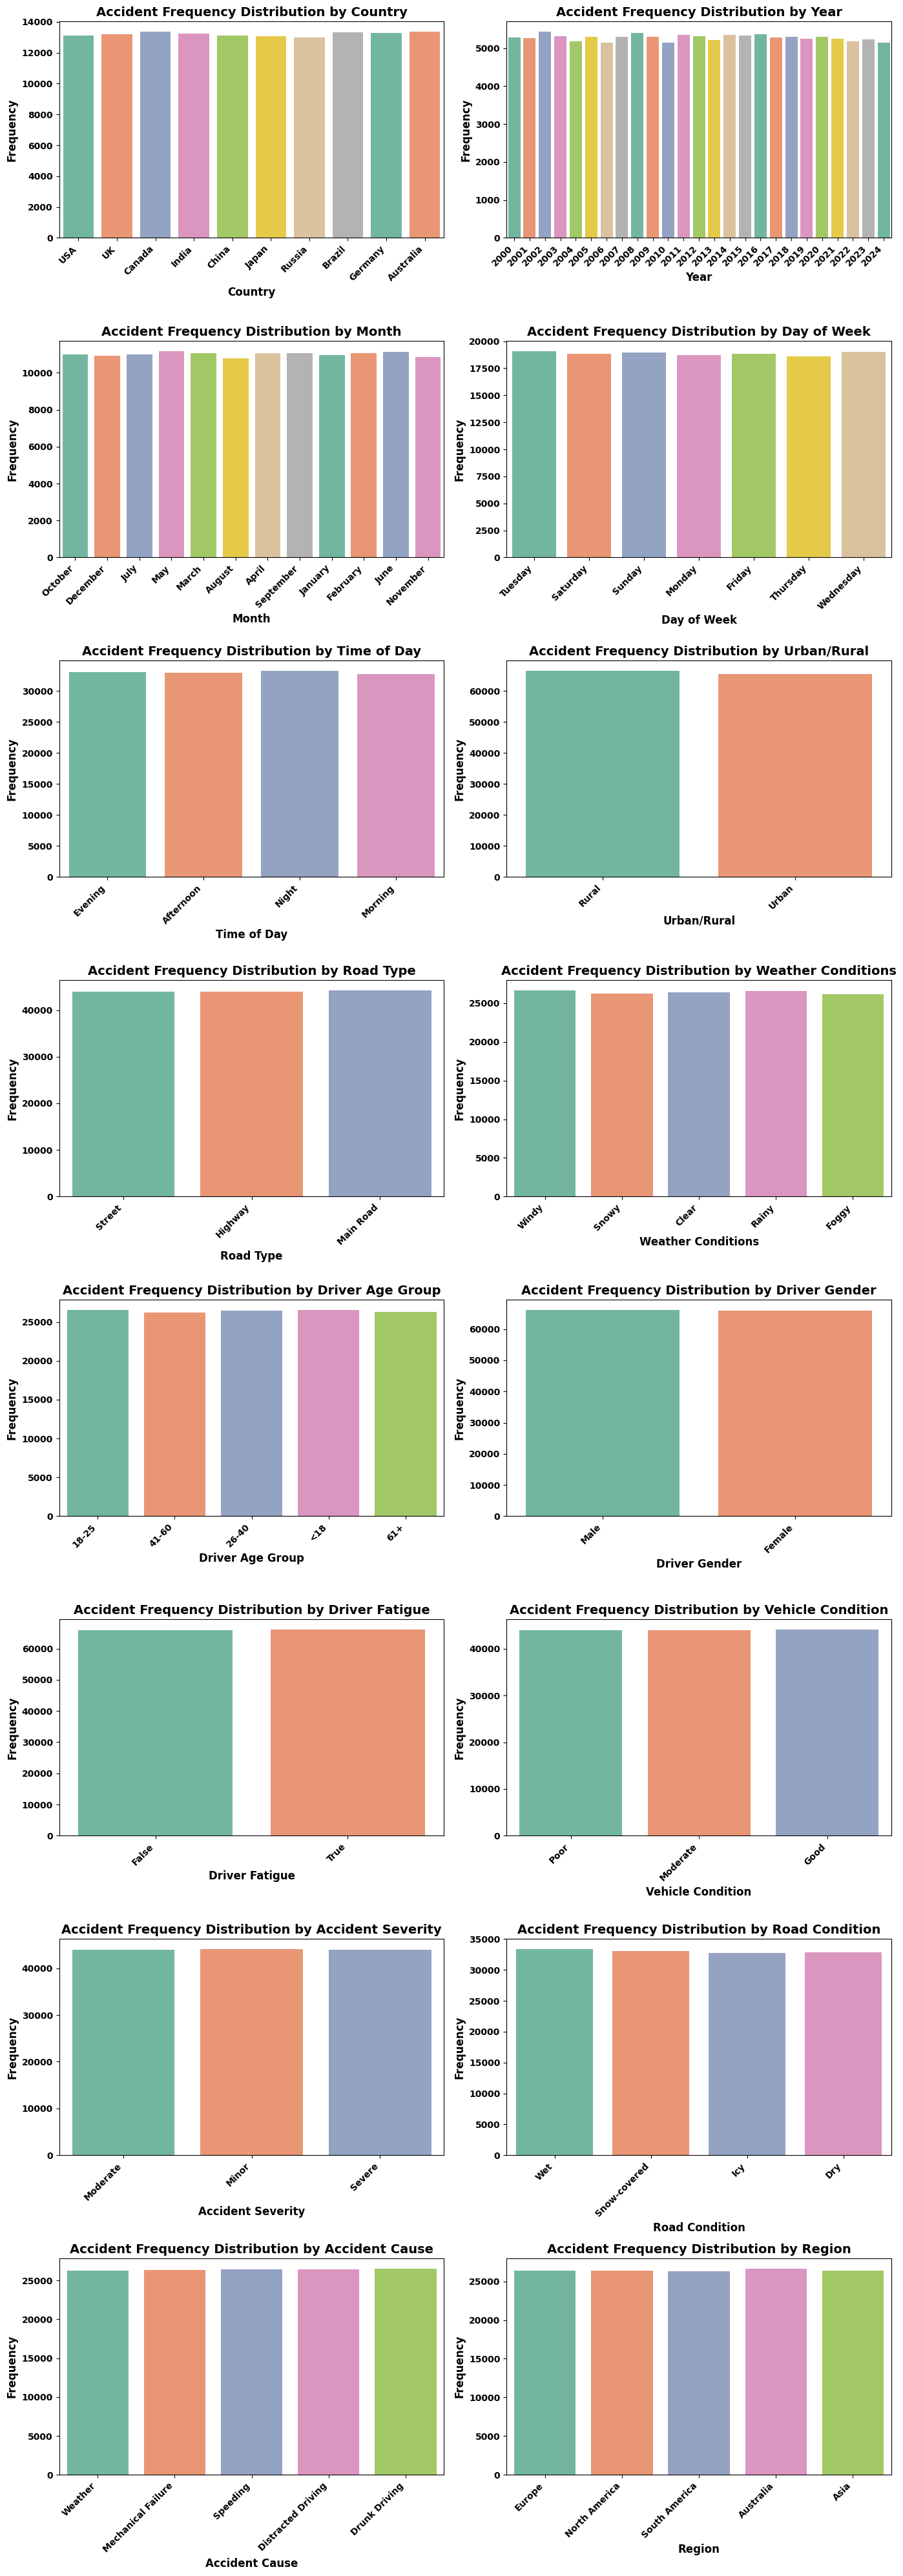

In [ ]:
plot_frequency_distribution(raw_df, categorical_features)

## Research Question  
- Are there any significant outliers present in the numeric variables?

In [ ]:
def separate_numerical_features(df):
  """
  This Method Returns Numerical
  """
  numerical_features = []
  for col in df.columns:
    if df.dtypes[col] in ['int64', 'float64']:
      numerical_features.append(col)
  return numerical_features

In [ ]:
numerical_features=separate_numerical_features(raw_df)

## 3.5: Box Plots

In [ ]:
def outliers_detection(df,numerical_features):
  ncols= 2
  nrows= 7

  plt.figure(figsize=(ncols* 6, nrows*3))

  for i, j in enumerate(numerical_features):
      plt.subplot(nrows, ncols, i+1)
      sns.boxplot(x= df[j], color= 'skyblue')

      plt.title(f"Boxplot of {j}",fontsize=14,fontweight='bold')
      plt.xlabel(j,fontsize=12,fontweight='bold')
      plt.xticks(fontsize=10,fontweight='bold')

  plt.tight_layout()
  plt.show()

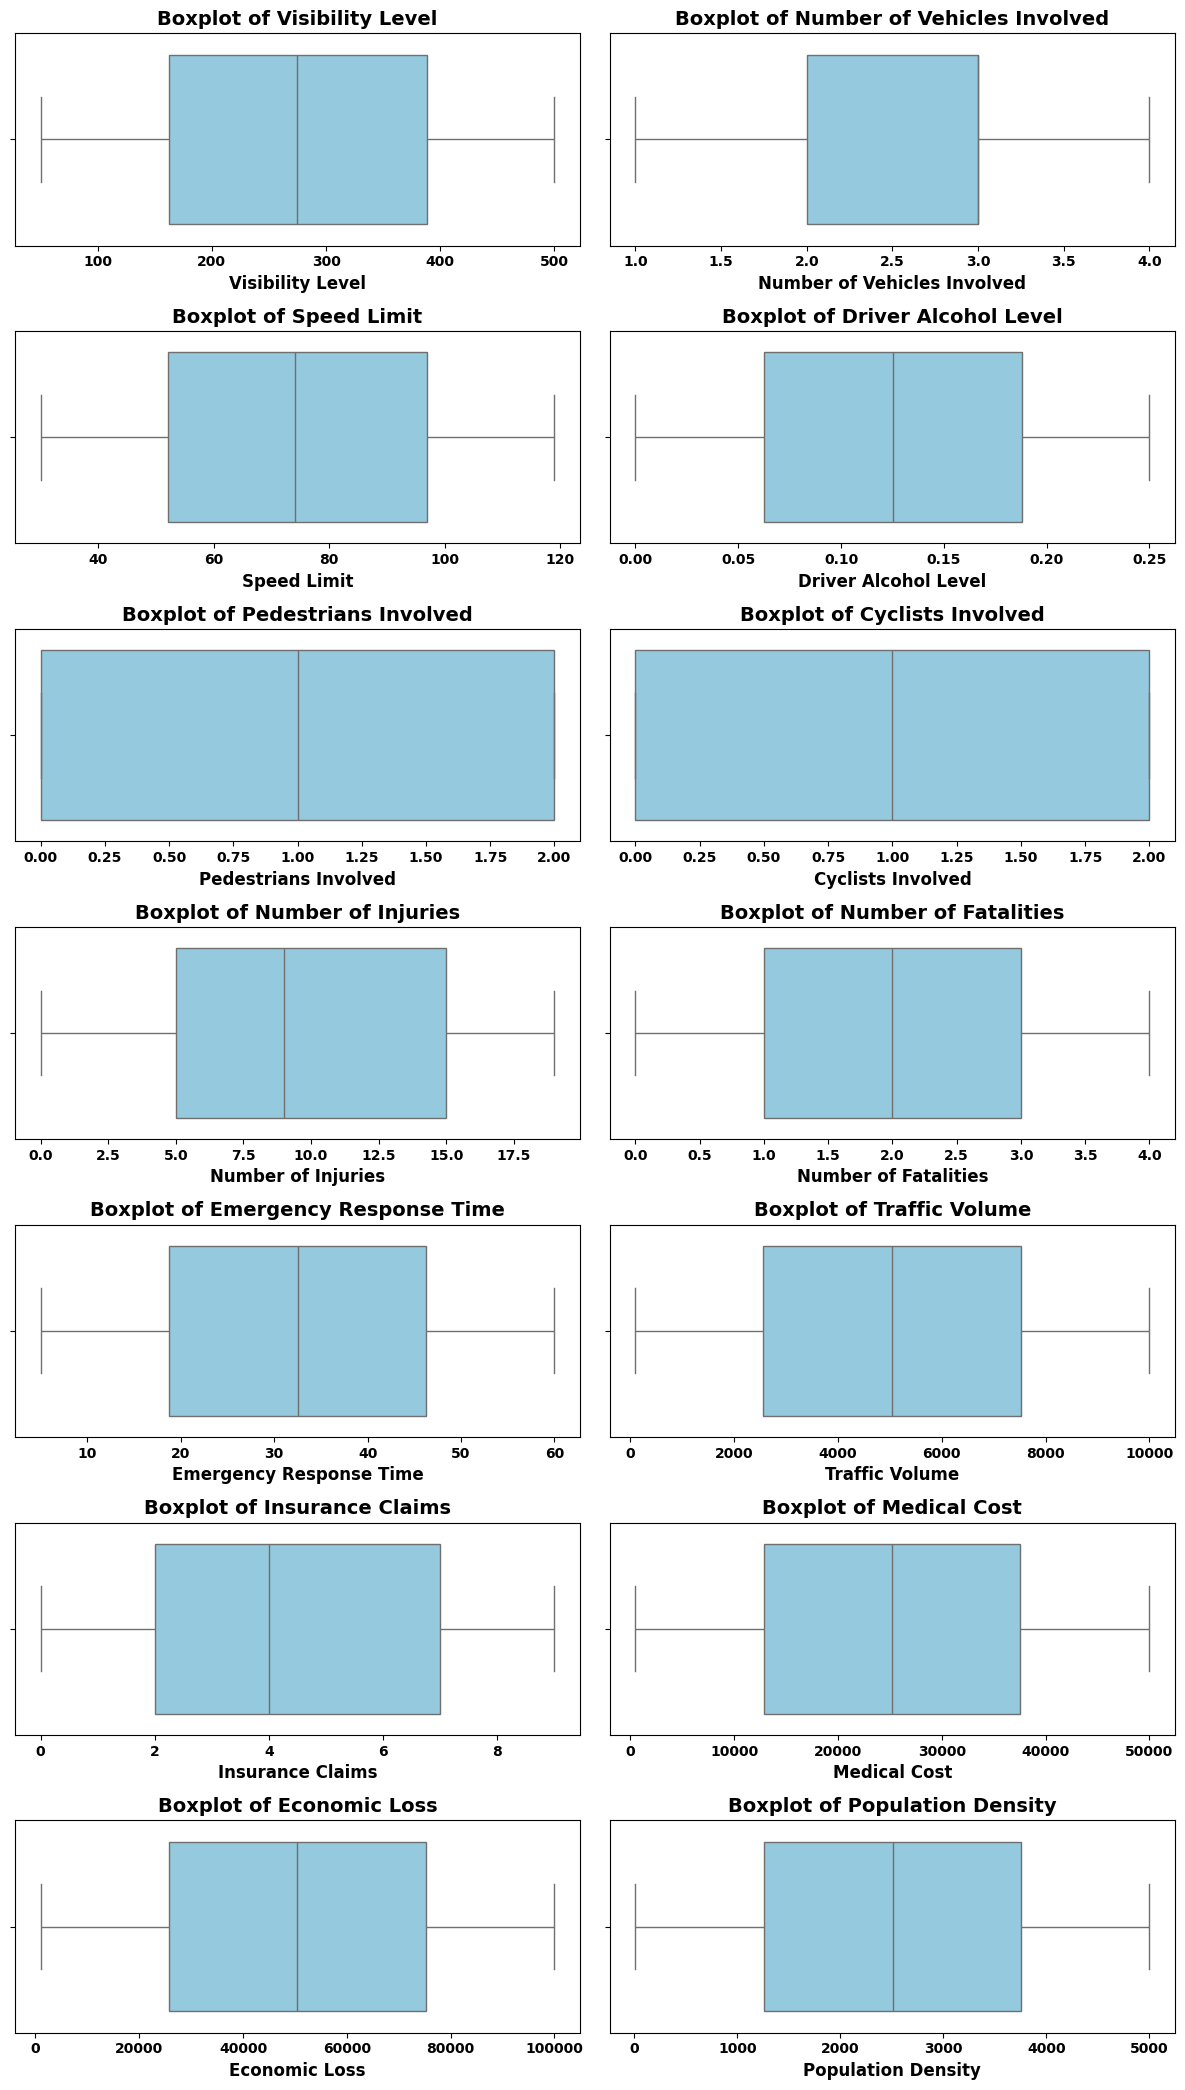

In [ ]:
outliers_detection(raw_df,numerical_features)

## 3.6: Exploratory Analysis of Variables Affecting Road Accidents

## 3.6.1: Accident Frequency

In [ ]:
def accicident_frequency(df):
  """
  """
  total_accidents = len(df)
  print(f"Total Number of Accidents reported in the dataset is {total_accidents}")

In [ ]:
accicident_frequency(raw_df)

Total Number of Accidents reported in the dataset is 132000


# **4. Predictive Modeling**


## 4.1 : Drop irrelavent Columns

In [ ]:
irrelevant_cols = [
    'Country', 'Year', 'Region', 'Medical Cost', 'Economic Loss', 'Traffic Volume'
]
raw_df=raw_df.drop(columns=irrelevant_cols)

## 4.2 : Separate target

In [ ]:
target_col = 'Accident Severity'
y = raw_df[target_col]
X = raw_df.drop(columns=[target_col])

## 4.3: Preprocessing (Encoding & Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## 4.3.1: Encoding

In [ ]:

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
raw_df = pd.get_dummies(raw_df, columns=categorical_cols, drop_first=True)
le_target = LabelEncoder()
y = le_target.fit_transform(y)  # Minor -> 0, Moderate -> 1, Severe -> 2


## 4.3.2: Scaling

In [ ]:
scaler = StandardScaler()
raw_df[numeric_cols] = scaler.fit_transform(raw_df[numeric_cols])

## 4.4 : Train-Test Split

In [ ]:
X = raw_df.drop(columns='Accident Severity')
# Transform the 'Accident Severity' column to numerical using the already fitted LabelEncoder.
# Ensure 'y' is a numerical pandas Series of integers before passing to train_test_split.
y_numerical = le_target.transform(raw_df['Accident Severity'])
y = pd.Series(y_numerical, index=raw_df.index, name='Accident Severity', dtype=int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## **4.5: Models Definition**

## 4.5.1: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
random_forest=RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.3305681818181818
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.36      0.35      8813
           1       0.33      0.33      0.33      8800
           2       0.32      0.30      0.31      8787

    accuracy                           0.33     26400
   macro avg       0.33      0.33      0.33     26400
weighted avg       0.33      0.33      0.33     26400

Confusion Matrix:
[[3166 2885 2762]
 [3170 2945 2685]
 [3203 2968 2616]]


## 4.5.2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42)
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.3327272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.39      0.36      8813
           1       0.33      0.46      0.39      8800
           2       0.33      0.14      0.20      8787

    accuracy                           0.33     26400
   macro avg       0.33      0.33      0.31     26400
weighted avg       0.33      0.33      0.32     26400

Confusion Matrix:
[[3481 4080 1252]
 [3500 4079 1221]
 [3494 4069 1224]]


## 4.5.3: (Neural Network)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [ ]:
num_features = X_train.shape[1]
num_classes = len(y.unique())

model = keras.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Neural Network Model Summary:")
model.summary()

Neural Network Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,363 (60.01 KB)

 Trainable params: 15,363 (60.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Explicitly convert y_train and y_test to numerical integer arrays
y_train_nn = np.asarray(y_train).astype(int)
y_test_nn = np.asarray(y_test).astype(int)

history = model.fit(X_train, y_train_nn, epochs=15, batch_size=16, validation_data=(X_test, y_test_nn), callbacks=[early_stopping])

print("Model training completed.")

Epoch 1/15
6600/6600 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.3309 - loss: 1.1088 - val_accuracy: 0.3330 - val_loss: 1.0987
Epoch 2/15
6600/6600 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.3355 - loss: 1.0989 - val_accuracy: 0.3335 - val_loss: 1.0986
Epoch 3/15
6600/6600 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.3312 - loss: 1.0989 - val_accuracy: 0.3334 - val_loss: 1.0987
Epoch 4/15
6600/6600 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.3368 - loss: 1.0989 - val_accuracy: 0.3344 - val_loss: 1.0986
Epoch 5/15
6600/6600 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3362 - loss: 1.0989 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 6/15
6600/6600 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3360 - loss: 1.0988 - val_accuracy: 0.3334 - val_loss: 1.0987
Epoch 7/15
6600/6600 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3338 - loss: 1.0987 - val_accuracy: 0.3347 - val_loss: 1.0987
Model training completed.


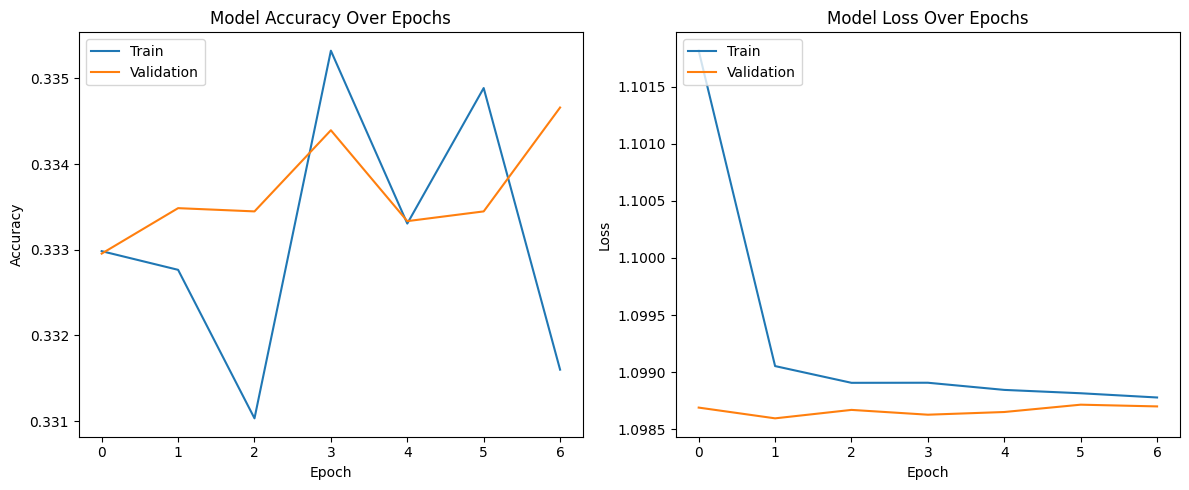

In [ ]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Final Though About Dataset


## **For the First Dataset (Kaggle Global Dataset)** [Link](https://www.kaggle.com/datasets/ankushpanday1/global-road-accidents-dataset)

*After conducting extensive experiments using the Kaggle Global Road Accidents dataset, all evaluated models (Decision Tree, Random Forest and Neural Network) consistently achieved approximately 33% accuracy, which aligns with the random baseline for a three-class classification problem. The dataset is balanced and contains no missing values, indicating that the performance limitation is not due to preprocessing, class imbalance, or model selection. Instead, the results suggest a weak relationship between the available features and the target variable (accident severity), limiting the models’ ability to learn meaningful patterns. Therefore, to achieve more reliable and predictive outcomes, it is advisable to transition to a dataset with more granular, accident-level features that are directly related to severity determination.*

## **For the Second Dataset (Addis Ababa Dataset)** [Link](https://data.mendeley.com/datasets/xytv86278f/1)

*The Addis Ababa Traffic Accident Dataset should be used for this study. It is sourced from a verified academic repository (Mendeley Data), ensuring credibility, transparency, and suitability for research purposes. The dataset contains structured, accident-level records with features that are approximately 85% comparable to the previously used dataset, while offering more meaningful severity-related variables. This makes it significantly more appropriate for supervised learning and predictive modeling. Although the data represents a single country, its structured nature and stronger feature–target relationship make it a more reliable choice for achieving valid and interpretable results.*